In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv("PBL5recommendationdata.csv",encoding='iso-8859-1')

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [4]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,...,Shop CareLineMedical.com For the Top Rated Med...,"barf bag, emesis bags, vomit bags, barf bags, ...",NaN,NaN,Emesis-BagsBlue-2,0.0,PK,24 Each / Pack,NaN,1 PK,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,24.0,NaN,1.0,NaN,418.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,5.00,5.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463412756,NaN,17425,3732,Kennithe,Tecora,NaN,17425,NaN,NaN,NaN,USD,NaN,39.99,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Bed-Assist-Bar,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,Yes,8.843890e+11,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,NaN,0.0,NaN,128.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,14.60,4.10,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1463413245,NaN,17426,3733,Tinna,Randall,NaN,17426,NaN,NaN,NaN,USD,NaN,1099.00,0.00,NaN,32.0,109.9,NaN,NaN,NaN,NaN,NaN,NaN,989.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.463413e+09,Berry,authorize.net,NaN,...,NaN,power scooter; electric power scooter; electri...,NaN,NaN,Spitfire-EX-Travel-4-Wheel-Mobility-Scooter-21...,0.0,EA,NaN,NaN,NaN,42.0,20.0,35.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/sp...,NaN,K0800,NaN,NaN,0.0,NaN,128.0,1099.00,NaN,Limited Lifetime on Frame; 14 Month Limited on...,0.0,NaN,Universal,Basic Assembly Required,No Installation Required,45.00,20.75,20.75,127.0,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,Na

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [6]:
df.shape

(4194, 181)

In [7]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [8]:
# df içinde hiç veri olmayan var örnek products.freight_cost onları bir silmemiz lazım.çok az veri olan var %20 den fazlası boş olanlar onları atıcaz.

In [9]:
#boş olanlardan yeni df yapalım
df1=pd.DataFrame(df.isnull().sum())

In [10]:
4194*20/100

838.8

In [11]:
df1

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.company,3467
Customers.create_date,0
...,...
Products.leg_style,4194
Products.seat_size,4032
Products.family_id,325
Products.saved_status,264


In [12]:
df2=df1[df1[0]>3000] #eğer binden fazlasıı boş ise atıcaz %20 denn fazladı boş çnkü

In [13]:
df2

,0
Customers.company,3467
Customers.status,4093
Customers.reminders,4194
Customers.tax_exempt,4189
Customers.account_id,4191
Customers.sales_rep,4194
Customers.rewards,4194
Customers.profile_id,4194
Orders.company,3466
Orders.reorder_id,4112


In [14]:
#şimdi ana df mizden boşlardan oluşan sutunları silmeliyiz

In [15]:
for i in df2.index:
    df.drop(i,axis=1,inplace=True)

In [16]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.notes,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_color,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.multiple,Products.latex,Products.upc,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.size,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,NaN,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.00,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,Insured By Eye4Fraud,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,0.0,NaN,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,Green,62.0,B00I6GQE0A,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,1 EA,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,0.0,136.0,0.0,24.80,7.50,30.40,NaN,PF61071,0.0
1,3,John,Smith,1386089139,NaN,1437764354,0.0,23,3,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,65.0,NaN,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,NaN,62.0,B000QF7Y76,health-care-products,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,1 EA,Yes,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,0.0,0.0,0.0,8.00,7.00,1.50,NaN,PF02132,NaN
2,3,John,Smith,1386089139,NaN,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.00,9.95,78.73,manual,0|Standard Shipping,NaN,

In [17]:
#boş sürunların hepsini ortalama ile dolduralım.

In [18]:
df3=df.select_dtypes(exclude=["object"]) #object olanları çıkarmalıyız.

In [19]:
#sayısal boş değerler ortalamar ile dolduruldu
for i in df3.select_dtypes(include=np.number):
    df3[i].fillna(df3[i].mean(),inplace=True)

In [20]:
df3

,Customers.id,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.seo_category,Products.upc,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status
0,797,1426018724,0.979659,1437764306,0.000000,3758,797,57.20,0.000000,9.950000,64.29,3.0,1.426019e+09,64.29,1,1426019099,1.438868e+09,1.426101e+09,0.000000,5284,3758,2310.0,1,57.20,44.00,2310.0,0.0,1.0,3.0,80.70,57.64,44.00,0.0,5.811138,1.463163e+09,1.0,1.088440e+13,62.0,199.0,22005.0,1.450325e+09,0.0,5.504591e+11,1.00000,0.0,136.000000,0.000000,24.80,7.50,30.40,0.000000
1,3,1386089139,0.979659,1437764354,0.000000,23,3,20.00,0.800838,9.990000,29.99,3.0,1.386090e+09,29.99,1,1386090455,1.440529e+09,1.386103e+09,0.000000,31,23,177.0,4,5.00,1.87,177.0,1.0,1.0,3.0,14.41,10.29,1.87,65.0,5.811138,1.462370e+09,1.0,1.008020e+13,62.0,199.0,22005.0,1.450322e+09,0.0,5.504591e+11,1.00000,0.0,0.000000,0.000000,8.00,7.00,1.50,0.876336
2,3,1386089139,0.979659,1437764354,0.000000,9531,3,68.78,0.000000,9.950000,78.73,3.0,1.449604e+09,78.73,3,1449603652,1.450213e+09,1.442167e+09,0.000000,11655,9531,1.0,1,68.78,52.50,1.0,0.0,1.0,3.0,96.29,68.78,52.50,32896.0,5.811138,1.463163e+09,1.0,4.008020e+13,62.0,199.0,22005.0,1.450321e+09,0.0,5.504591e+11,800.00000,0.0,65.059943,0.064423,13.23,10.04,10.24,0.000000
3,4,1386780263,0.979659,1437762646,0.000000,29,4,19.56,0.000000,9.950000,29.55,3.0,1.386780e+09,29.55,1,1386780263,1.440529e+09,1.386800e+09,0.000000,1816,29,983.0,1,19.56,12.62,983.0,0.0,1.0,3.0,27.38,19.56,12.62,0.0,5.811138,1.462595e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,8.019675e+10,1.00000,0.0,65.059943,0.064423,10.60,7.80,18.50,0.876336
4,5,1386861599,0.000000,1437764316,0.000000,30,5,36.05,0.800838,9.950000,46.00,3.0,1.386862e+09,46.00,1,1386861599,1.440529e+09,1.386876e+09,0.000000,40,30,991.0,1,36.05,25.75,991.0,1.0,1.0,3.0,50.47,36.05,25.75,0.0,5.811138,1.462370e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,5.504591e+11,1.00000,0.0,65.059943,0.064423,8.50,2.75,12.00,0.876336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,1463408698,1.000000,1463408698,0.000000,17421,3730,14.85,1.210000,0.000000,16.06,3.0,1.463409e+09,16.06,0,1463408854,1.449607e+09,1.442167e+09,0.000000,20186,17421,1842.0,1,14.85,15.50,1842.0,3.0,1.0,3.0,33.11,23.65,15.50,32896.0,6.000000,1.462370e+09,1.0,8.843890e+11,62.0,199.0,22005.0,1.450324e+09,0.0,8.843890e+11,24.00000,1.0,418.000000,0.000000,5.00,5.00,7.00,3.000000
4190,3732,1463412756,0.979659,1463412756,0.137364,17425,3732,39.99,0.000000,7.141263,39.99,1.0,1.463413e+09,39.99,0,1463412757,1.449607e+09,1.442167e+09,0.124159,20190,17425,782.0,1,39.99,28.16,782.0,3.0,1.0,3.0,55.19,69.99,28.16,0.0,6.000000,1.462574e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450322e+09,0.0,8.843890e+11,1.00000,0.0,128.000000,0.000000,14.60,4.10,18.00,3.000000
4191,3733,1463413245,0.979659,1463413245,0.137364,17426,3733,1099.00,0.000000,7.141263,989.10,1.0,1.463413e+09,989.10,5,1463413246,1.463420e+09,1.442167e+09,0.000000,20191,17426,2707.0,1,1099.00,675.00,2707.0,3.0,2.0,1.0,2107.50,109

In [21]:
df3.isnull().sum()

Customers.id                 0
Customers.create_date        0
Customers.mailing            0
Customers.last_modified      0
Customers.customer_type      0
Orders.id                    0
Orders.customer_id           0
Orders.subtotal              0
Orders.tax                   0
Orders.shipping              0
Orders.total                 0
Orders.payment_status        0
Orders.payment_date          0
Orders.payment_amount        0
Orders.status                0
Orders.placed_date           0
Orders.updated_date          0
Orders.shipped_date          0
Orders.customer_type         0
Order_Items.id               0
Order_Items.parent           0
Order_Items.product_id       0
Order_Items.qty              0
Order_Items.price            0
Order_Items.cost             0
Products.id                  0
Products.status              0
Products.vendor              0
Products.import_id           0
Products.list_price          0
Products.price               0
Products.cost                0
Products

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customers.id               4194 non-null   int64  
 1   Customers.create_date      4194 non-null   int64  
 2   Customers.mailing          4194 non-null   float64
 3   Customers.last_modified    4194 non-null   int64  
 4   Customers.customer_type    4194 non-null   float64
 5   Orders.id                  4194 non-null   int64  
 6   Orders.customer_id         4194 non-null   int64  
 7   Orders.subtotal            4194 non-null   float64
 8   Orders.tax                 4194 non-null   float64
 9   Orders.shipping            4194 non-null   float64
 10  Orders.total               4194 non-null   float64
 11  Orders.payment_status      4194 non-null   float64
 12  Orders.payment_date        4194 non-null   float64
 13  Orders.payment_amount      4194 non-null   float

In [25]:
x=df3.drop(["Customers.create_date","Customers.last_modified","Orders.payment_date","Orders.placed_date","Orders.updated_date","Orders.shipped_date","Order_Items.id","Order_Items.product_id","Products.shopping_gtin","Products.qb_edit_sequence","Products.upc"],axis=1)

In [26]:
x.head()

,Customers.id,Customers.mailing,Customers.customer_type,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.parent,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_flags,Products.shopping_cat,Products.shopzilla_cat,Products.seo_category,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status
0,797,0.979659,0.0,3758,797,57.20,0.000000,9.95,64.29,3.0,64.29,1,0.0,3758,1,57.20,44.00,2310.0,0.0,1.0,3.0,80.70,57.64,44.00,0.0,5.811138,1.463163e+09,1.0,62.0,199.0,22005.0,0.0,1.0,0.0,136.000000,0.000000,24.80,7.50,30.40,0.000000
1,3,0.979659,0.0,23,3,20.00,0.800838,9.99,29.99,3.0,29.99,1,0.0,23,4,5.00,1.87,177.0,1.0,1.0,3.0,14.41,10.29,1.87,65.0,5.811138,1.462370e+09,1.0,62.0,199.0,22005.0,0.0,1.0,0.0,0.000000,0.000000,8.00,7.00,1.50,0.876336
2,3,0.979659,0.0,9531,3,68.78,0.000000,9.95,78.73,3.0,78.73,3,0.0,9531,1,68.78,52.50,1.0,0.0,1.0,3.0,96.29,68.78,52.50,32896.0,5.811138,1.463163e+09,1.0,62.0,199.0,22005.0,0.0,800.0,0.0,65.059943,0.064423,13.23,10.04,10.24,0.000000
3,4,0.979659,0.0,29,4,19.56,0.000000,9.95,29.55,3.0,29.55,1,0.0,29,1,19.56,12.62,983.0,0.0,1.0,3.0,27.38,19.56,12.62,0.0,5.811138,1.462595e+09,1.0,62.0,199.0,22005.0,0.0,1.0,0.0,65.059943,0.064423,10.60,7.80,18.50,0.876336
4,5,0.000000,0.0,30,5,36.05,0.800838,9.95,46.00,3.0,46.00,1,0.0,30,1,36.05,25.75,991.0,1.0,1.0,3.0,50.47,36.05,25.75,0.0,5.811138,1.462370e+09,1.0,62.0,199.0,22005.0,0.0,1.0,0.0,65.059943,0.064423,8.50,2.75,12.00,0.876336


In [27]:
model=KMeans(n_clusters=4)

In [28]:
tahmin=model.fit(x)

In [29]:
tahmin=model.predict(x)

In [30]:
tahmin

array([2, 0, 2, ..., 2, 2, 2], dtype=int32)

In [31]:
x["cluster"]=tahmin #x in içinde sütun oluşturduk yeni cluster diye

In [32]:
x.head()

,Customers.id,Customers.mailing,Customers.customer_type,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.parent,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_flags,Products.shopping_cat,Products.shopzilla_cat,Products.seo_category,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,cluster
0,797,0.979659,0.0,3758,797,57.20,0.000000,9.95,64.29,3.0,64.29,1,0.0,3758,1,57.20,44.00,2310.0,0.0,1.0,3.0,80.70,57.64,44.00,0.0,5.811138,1.463163e+09,1.0,62.0,199.0,22005.0,0.0,1.0,0.0,136.000000,0.000000,24.80,7.50,30.40,0.000000,2
1,3,0.979659,0.0,23,3,20.00,0.800838,9.99,29.99,3.0,29.99,1,0.0,23,4,5.00,1.87,177.0,1.0,1.0,3.0,14.41,10.29,1.87,65.0,5.811138,1.462370e+09,1.0,62.0,199.0,22005.0,0.0,1.0,0.0,0.000000,0.000000,8.00,7.00,1.50,0.876336,0
2,3,0.979659,0.0,9531,3,68.78,0.000000,9.95,78.73,3.0,78.73,3,0.0,9531,1,68.78,52.50,1.0,0.0,1.0,3.0,96.29,68.78,52.50,32896.0,5.811138,1.463163e+09,1.0,62.0,199.0,22005.0,0.0,800.0,0.0,65.059943,0.064423,13.23,10.04,10.24,0.000000,2
3,4,0.979659,0.0,29,4,19.56,0.000000,9.95,29.55,3.0,29.55,1,0.0,29,1,19.56,12.62,983.0,0.0,1.0,3.0,27.38,19.56,12.62,0.0,5.811138,1.462595e+09,1.0,62.0,199.0,22005.0,0.0,1.0,0.0,65.059943,0.064423,10.60,7.80,18.50,0.876336,0
4,5,0.000000,0.0,30,5,36.05,0.800838,9.95,46.00,3.0,46.00,1,0.0,30,1,36.05,25.75,991.0,1.0,1.0,3.0,50.47,36.05,25.75,0.0,5.811138,1.462370e+09,1.0,62.0,199.0,22005.0,0.0,1.0,0.0,65.059943,0.064423,8.50,2.75,12.00,0.876336,0


In [33]:
silhouette_score(x,tahmin)

0.8836717627276616

In [34]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster",i,"score",score)
        allscore.append(score)
        allclusters.append(i)#clustere göre score değişimi
        uzakliklar.append(uzaklik)
clust(15)        

Cluster 2 score 0.9033169532315248
Cluster 3 score 0.8779736321550704
Cluster 4 score 0.8836717627276616
Cluster 5 score 0.8979210061606662
Cluster 6 score 0.9099556726331044
Cluster 7 score 0.911949862361056
Cluster 8 score 0.9123004616517995
Cluster 9 score 0.9203204015088222
Cluster 10 score 0.9202120040194168
Cluster 11 score 0.9201867023356273
Cluster 12 score 0.8923942609301162
Cluster 13 score 0.8926213048068952
Cluster 14 score 0.846077001627633
Cluster 15 score 0.84773568876171
Cluster 16 score 0.847723563486469


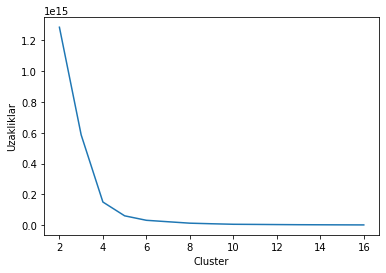

In [35]:
plt.xlabel("Cluster")
plt.ylabel("Uzakliklar")
plt.plot(allclusters,uzakliklar);